
<a href="https://colab.research.google.com/github/pr0fez/AI23-Deep_learning/blob/main/Exercises/E1-MLP_image_classification.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Multilayered perceptron (MLP) image classification exercises 

---
These are introductory exercises in Deep learning with focus in **MLP** for image classification.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Fashion dataset (*)

Zalando has provided an MNIST dataset for fashion, with the format very similar to the original MNIST digits dataset. Start with loading this fashion dataset from TensorFlow Keras. 

&nbsp; a) Start visualizing some of the sample images 

&nbsp; b) Normalize the images to values between 0 and 1 

&nbsp; c) Visualize same images as before, do you see any difference? 

&nbsp; d) Make histogram of a sample image before and after normalization. What do you notice? 

&nbsp; e) Check if the dataset is balanced.

<details>

<summary>Hint</summary>

</details>

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>

---

In [110]:
import keras
from keras.models import Sequential
from keras import layers
from matplotlib import pyplot as plt
fashion_mnist = keras.datasets.fashion_mnist.load_data()

In [111]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist
train_images = train_images
test_images = test_images

print(f"train images shape: {train_images.shape}")
print(f"train labels shape: {train_labels.shape}")
print(f"test images shape: {test_images.shape}")
print(f"test labels shape: {test_labels.shape}")

train images shape: (60000, 28, 28)
train labels shape: (60000,)
test images shape: (10000, 28, 28)
test labels shape: (10000,)


Histogram över original bild:

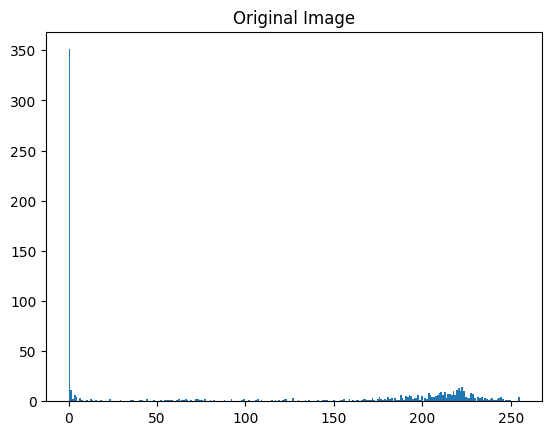

In [112]:
image_original = train_images[0]
plt.hist(image_original.flatten(), bins=256)
plt.title("Original Image")
plt.show()

Normaliserar datan:

In [113]:
train_imeages = train_images / 255.0
test_images = test_images / 255.0

Histogram på bilden där varje pixel har delats med 255.0

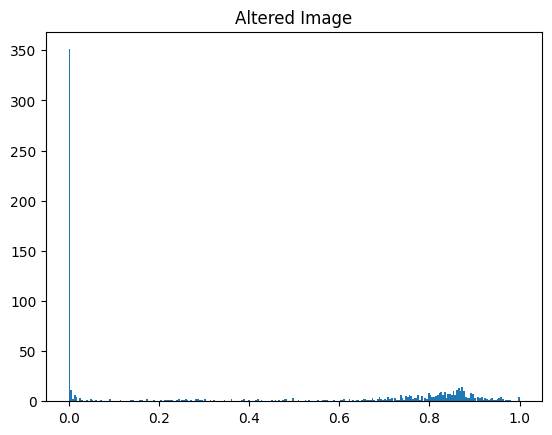

In [114]:
image_altered = image_original / 255.0
plt.hist(image_altered.flatten(), bins=256)
plt.title("Altered Image")
plt.show()

Plottar innehållet i första bilden:

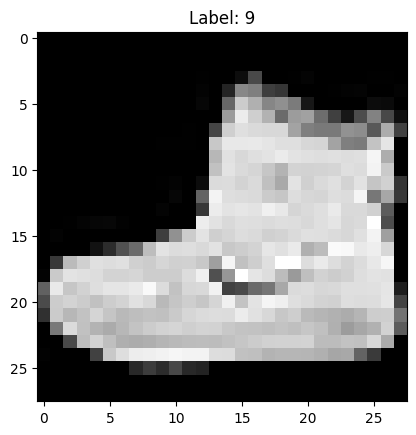

In [115]:
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

Kollar om datasetet är balanserat. Definitionen av balanserat är om det är lika många artiklar i varje klass. Detta datasetet är balanserat.


In [116]:
import numpy as np

unique_labels = np.unique(train_labels)
num_unique_labels = len(unique_labels)
print(f"Number of unique values in train_labels: {num_unique_labels}")
unique, counts = np.unique(train_labels, return_counts=True)
label_counts = dict(zip(unique, counts))
print("Counts of each unique value in train_labels:", label_counts)

Number of unique values in train_labels: 10
Counts of each unique value in train_labels: {np.uint8(0): np.int64(6000), np.uint8(1): np.int64(6000), np.uint8(2): np.int64(6000), np.uint8(3): np.int64(6000), np.uint8(4): np.int64(6000), np.uint8(5): np.int64(6000), np.uint8(6): np.int64(6000), np.uint8(7): np.int64(6000), np.uint8(8): np.int64(6000), np.uint8(9): np.int64(6000)}


## 1. MLP architecture (*)

As we know from the lectures, there are no certain mathematical rules for choosing number of nodes and hidden layers. What we can do is to do trial and error, but it would be expensive to not have any guidelines. Look at this [video](https://www.youtube.com/watch?v=bqBRET7tbiQ) and this [blog article ](https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af) for rule of thumbs. Note that this will be computationally expensive on your laptop for larger networks and higher resolution images. Log in to kaggle and create a jupyter notebook inside kaggle and enable GPU. Remember to shut off the GPU after you're done with your work, you get a certain amount of quotas every week. 

&nbsp; a) Create a network with no hidden layers, fit the model for 50 epochs. Use 10000 samples for validation. 

&nbsp; b) Plot training loss vs validation loss and accuracy against validation accuracy. 

&nbsp; c) Repeat a) and b) for hidden_layers $\in \{1,2,3\}$

&nbsp; d) Add dropout layers and choose a rate of dropout, and perform a few experiments. Note that you shouldn't add dropout layers after input layer and after output layer. 

&nbsp; f) Define an experiment you want to investigate and perform it.

&nbsp; g) Choose a model from your experiments. 


<details>

<summary>Hint</summary>

d) Hidden layers are used to decrease overfitting. Can you see how it impacts your loss curves?

</details>

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>

---

In [117]:
from sklearn.model_selection import train_test_split

Skapar ett validation dataset på 10.000 baserat på training dataset.

In [118]:
train_images_val, valid_images, train_labels_val, valid_labels = train_test_split(train_images, train_labels, test_size=1/6)
train_images.shape, train_images_val.shape, valid_images.shape, test_images.shape

((60000, 28, 28), (50000, 28, 28), (10000, 28, 28), (10000, 28, 28))

Reshape'ar så att det blir en vektor istället för en matris.

In [119]:
train_images = train_images.reshape((60000, 28*28))
train_images_val = train_images_val.reshape((50000, 28*28))
valid_images = valid_images.reshape((10000, 28*28))
test_images = test_images.reshape((10000, 28*28))
train_images.shape, train_images_val.shape, valid_images.shape, test_images.shape

((60000, 784), (50000, 784), (10000, 784), (10000, 784))

Skapar en shallow model helt utan hidden layers.

In [106]:
shallow_model = keras.models.Sequential([
    layers.Dense(10, activation='softmax')
])

#model = keras.models.Sequential(name="Shallow_network")
#model.add(layers.InputLayer((train_labels.shape[1],), name="input_layer"))
#model.add(layers.Dense(512, activation='relu', name="hidden-layer-1"))
#model.add(layers.Dense(32, activation='sigmoid', name="hidden-layer-2"))
#model.add(layers.Dense(10, name="output-layer"))

In [107]:
shallow_model.compile(loss="sparse_categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [108]:
shallow_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [120]:
shallow_model.fit(train_images_val, train_labels_val, epochs=50, validation_data=(valid_images, valid_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6599 - loss: 30.2896 - val_accuracy: 0.8099 - val_loss: 11.4721
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7755 - loss: 17.2330 - val_accuracy: 0.6835 - val_loss: 28.5958
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7880 - loss: 16.1689 - val_accuracy: 0.7620 - val_loss: 20.7432
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7952 - loss: 15.3423 - val_accuracy: 0.6802 - val_loss: 30.1757
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7957 - loss: 15.2829 - val_accuracy: 0.7476 - val_loss: 19.9376
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7987 - loss: 14.8821 - val_accuracy: 0.8041 - val_loss: 15.5008
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8012 - loss: 14.7445 - val_accuracy: 0.6839 - val_loss: 39.0845
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8047 - l

In [121]:
shallow_model.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

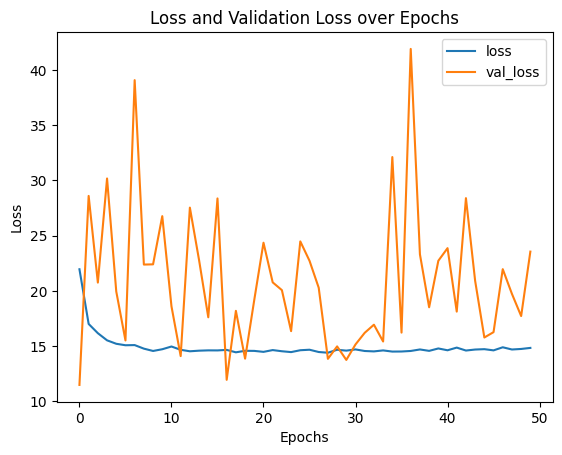

In [122]:
# Plotting loss and validation loss over epochs
plt.plot(shallow_model.history.history['loss'], label='loss')
plt.plot(shallow_model.history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss and Validation Loss over Epochs')
plt.legend()
plt.show()

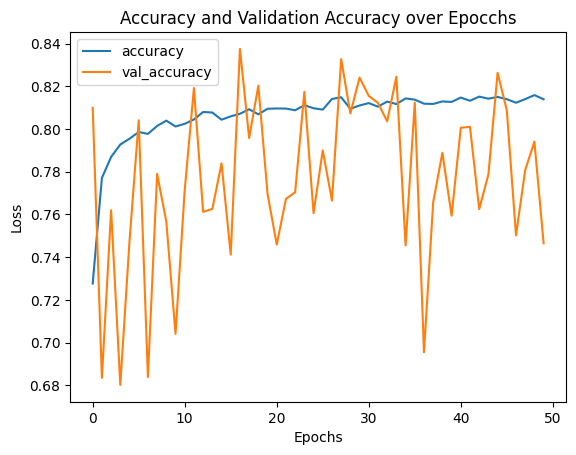

In [126]:
# Plotting accurazy and validation accurazy over epochs
plt.plot(shallow_model.history.history['accuracy'], label='accuracy')
plt.plot(shallow_model.history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy and Validation Accuracy over Epocchs')
plt.legend()
plt.show()

Skapar en modell med ett hidden layer.

In [140]:
one_hidden_model = keras.models.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [141]:
one_hidden_model.compile(loss="sparse_categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [142]:
one_hidden_model.fit(train_images_val, train_labels_val, epochs=10, validation_data=(valid_images, valid_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4274 - loss: 5.8265 - val_accuracy: 0.5853 - val_loss: 1.1662
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5867 - loss: 1.1668 - val_accuracy: 0.6033 - val_loss: 1.0954
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6345 - loss: 1.1018 - val_accuracy: 0.6912 - val_loss: 0.9772
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6667 - loss: 0.9903 - val_accuracy: 0.6740 - val_loss: 1.0396
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6702 - loss: 0.9452 - val_accuracy: 0.6544 - val_loss: 0.9994
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6704 - loss: 0.9525 - val_accuracy: 0.6863 - val_loss: 1.0116
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6740 - loss: 0.9440 - val_accuracy: 0.6908 - val_loss: 0.9395
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6802 - loss: 0.9273 - 

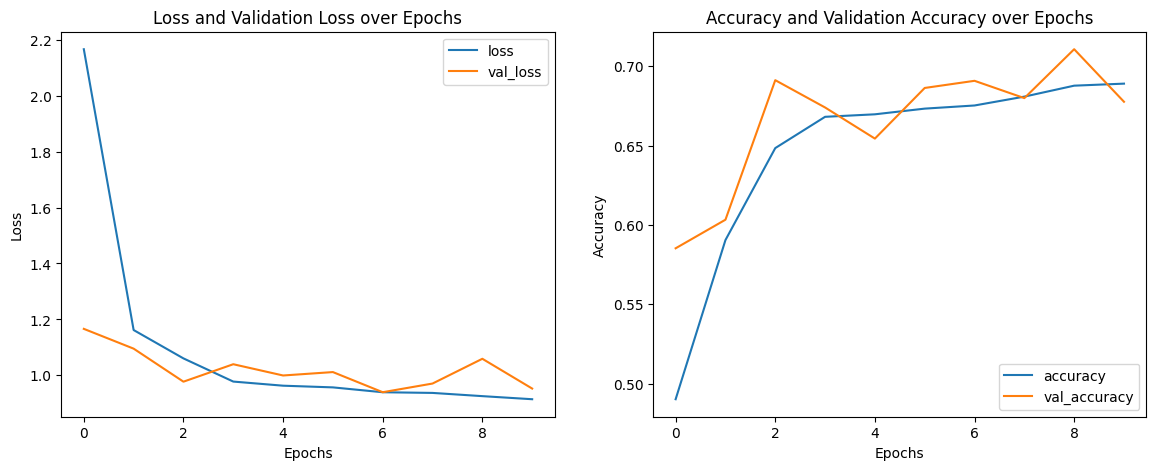

In [143]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotting loss and validation loss over epochs
ax1.plot(one_hidden_model.history.history['loss'], label='loss')
ax1.plot(one_hidden_model.history.history['val_loss'], label='val_loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Loss and Validation Loss over Epochs')
ax1.legend()

# Plotting accuracy and validation accuracy over epochs
ax2.plot(one_hidden_model.history.history['accuracy'], label='accuracy')
ax2.plot(one_hidden_model.history.history['val_accuracy'], label='val_accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy and Validation Accuracy over Epochs')
ax2.legend()

plt.show()

Neural network with two hidden layers.

In [ ]:
two_hidden_model = keras.models.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [133]:
two_hidden_model.compile(loss="sparse_categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [134]:
two_hidden_model.fit(train_images_val, train_labels_val, epochs=10, validation_data=(valid_images, valid_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4478 - loss: 1.5892 - val_accuracy: 0.6999 - val_loss: 0.8033
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6925 - loss: 0.8073 - val_accuracy: 0.7324 - val_loss: 0.6975
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7166 - loss: 0.7481 - val_accuracy: 0.7508 - val_loss: 0.6632
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7287 - loss: 0.7090 - val_accuracy: 0.7401 - val_loss: 0.6667
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7334 - loss: 0.6838 - val_accuracy: 0.7567 - val_loss: 0.6652
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7492 - loss: 0.6820 - val_accuracy: 0.7707 - val_loss: 0.6856
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7596 - loss: 0.6646 - val_accuracy: 0.7807 - val_loss: 0.6035
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7724 - loss: 0.6319

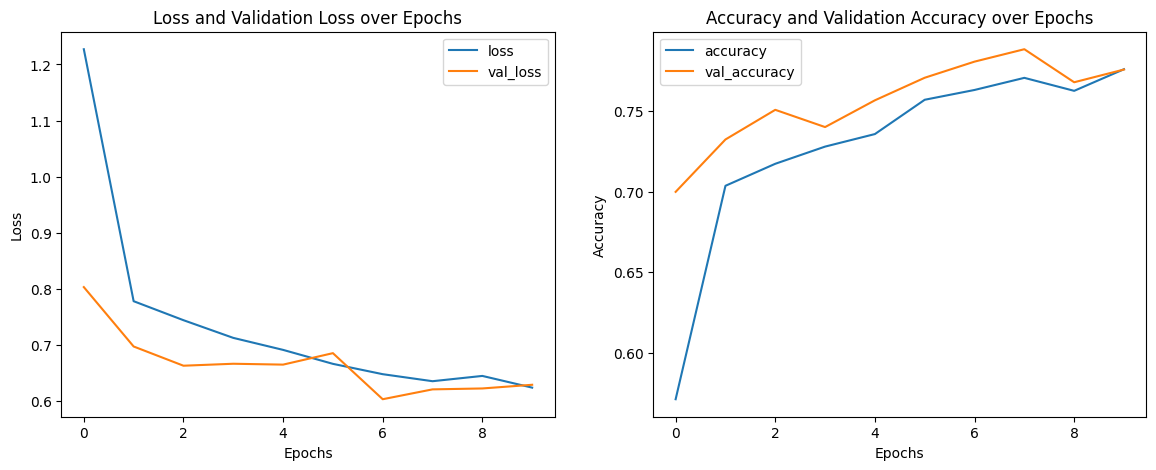

In [135]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotting loss and validation loss over epochs
ax1.plot(two_hidden_model.history.history['loss'], label='loss')
ax1.plot(two_hidden_model.history.history['val_loss'], label='val_loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Loss and Validation Loss over Epochs')
ax1.legend()

# Plotting accuracy and validation accuracy over epochs
ax2.plot(two_hidden_model.history.history['accuracy'], label='accuracy')
ax2.plot(two_hidden_model.history.history['val_accuracy'], label='val_accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy and Validation Accuracy over Epochs')
ax2.legend()

plt.show()

Create a NN with three hidden layers.

In [144]:
three_hidden_model = keras.models.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

In [145]:
three_hidden_model.compile(loss="sparse_categorical_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [146]:
three_hidden_model.fit(train_images_val, train_labels_val, epochs=10, validation_data=(valid_images, valid_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1597 - loss: 2.2388 - val_accuracy: 0.2434 - val_loss: 1.8038
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2837 - loss: 1.7125 - val_accuracy: 0.3703 - val_loss: 1.5330
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.3455 - loss: 1.5175 - val_accuracy: 0.3855 - val_loss: 1.4316
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3982 - loss: 1.4276 - val_accuracy: 0.5195 - val_loss: 1.2012
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.4611 - loss: 1.2530 - val_accuracy: 0.4815 - val_loss: 1.2864
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5018 - loss: 1.2255 - val_accuracy: 0.5442 - val_loss: 1.1469
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4916 - loss: 1.1856 - val_accuracy: 0.3546 - val_loss: 1.5238
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4757 - loss:

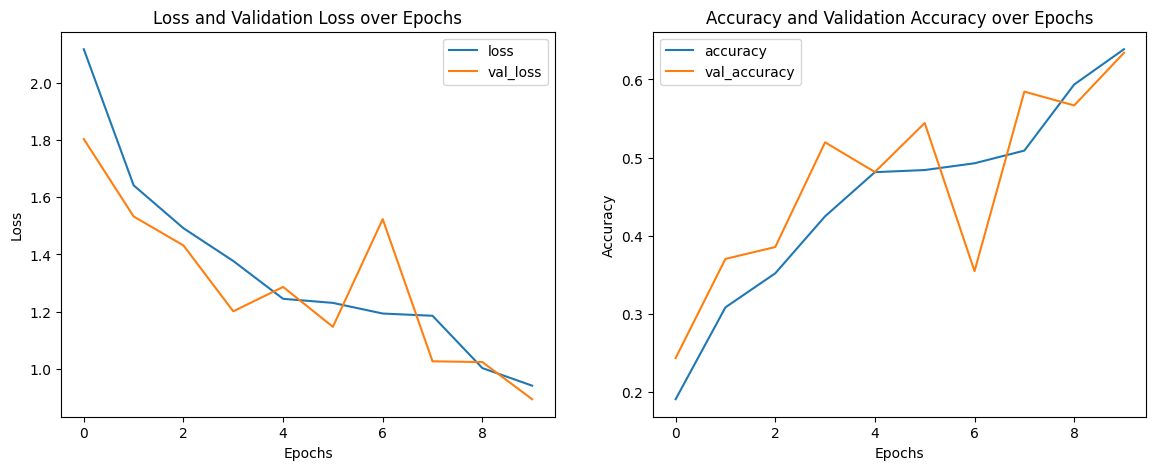

In [147]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotting loss and validation loss over epochs
ax1.plot(three_hidden_model.history.history['loss'], label='loss')
ax1.plot(three_hidden_model.history.history['val_loss'], label='val_loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Loss and Validation Loss over Epochs')
ax1.legend()

# Plotting accuracy and validation accuracy over epochs
ax2.plot(three_hidden_model.history.history['accuracy'], label='accuracy')
ax2.plot(three_hidden_model.history.history['val_accuracy'], label='val_accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy and Validation Accuracy over Epochs')
ax2.legend()

plt.show()

## 2. Predict and evaluate (*)

Use the model you've chosen from 1. and train on all training data. Also add early stopping to further avoid overfitting. Predict on the test data and evaluate your model.

&nbsp; a) Which item was hardest to classify? Do you have any ideas of why?

&nbsp; b) Show a few samples from each category that was misclassified.

&nbsp; c) Create a folder through Python called Misclassified and save the misclassified images there. 

<details>

<summary>Answer</summary>

No answers here, discuss with your fellow data scientists to move forward if you're stuck.


</details>


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---